Importa o modelo a ser fatiado e mapeado

In [1]:
import matplotlib.pyplot as plt
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

home = getcwd()
choice = gui.ask_load_or_begin()
folders = files.Paths(home)
if choice == "Novo Projeto":
    path_input, file_name = gui.load_model(folders)
    [dpi, layer_height] = gui.ask_parameters_input()
    with Timer("Fase 0: "):
        if file_name.endswith(".stl") or file_name.endswith(".STL"):
            folders.create_layers_3d(path_input, dpi, layer_height, file_name, folders)
        else:
            folders.create_layers_2d(path_input, dpi, layer_height, file_name, folders)
    layer.divide_islands(folders)
elif choice == "Carregar Salvo":
    gui.find_saved_file(folders)
elif choice == "Cancelar":
    quit

#TODO: encontrar uma forma de jogar layerHight para o slicing W/images (POSSIVELMENTE COM O RUNSINGLEMODEL)

Fase 0: 
Total de [Fase 0: ] : 0.22954797744750977


Paredes Finas

In [2]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.Paths(home)
    gui.find_saved_file(folders)
[nozzle_diam_internal,nozzle_diam_external] = gui.ask_parameters_thin_walls()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 1: Camada: " + str(i)):
        c.make_thin_walls(folders, nozzle_diam_external, nozzle_diam_internal)

%reset_selective -f "camadas"
%reset_selective -f "c"
# TODO: arvore de paredes finas
# TODO: quando duas áreas se encontram
# TODO: limite de parede diam minimo
# TODO: anotar todos os (não fechou contorno)
# TODO arrumar para origens extremamente pequenas, ignorar da problema
# TODO arrumar casos onde a beirada esta vazndo criando areas triangulares distantes
# FIXME: Precisa mesmo separar linha 1 2 topo e baixo? muitos elementos estão sendo criados

Fase 1: Camada: 0
Criando paredes finas
OK: fechou contorno
OK: fechou contorno
OK: fechou contorno
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.8654141426086426
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.11699128150939941
Total de [Criando paredes finas] : 12.686471700668335
Total de [Fase 1: Camada: 0] : 12.72547173500061


Contornos

In [3]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.Paths(home)
    gui.find_saved_file(folders)
[void_max,internal_max,external_max] = gui.ask_parameters_offsets()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 2: Camada: " + str(i)):
        c.make_offsets(folders, void_max, external_max, internal_max)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
        print("pausa")
%reset_selective -f "camadas"
%reset_selective -f "c"

Fase 2: Camada: 0
Criando Lvls
Ilha: I_000 Número de Níveis: 7
Total de [Criando Lvls] : 6.095388174057007
Criando os loops
Total de [Criando os loops] : 5.928848505020142
Criando regiões de influência
Total de [Criando regiões de influência] : 1.9907448291778564
Criando as regiões de Offset
Total de [Criando as regiões de Offset] : 16.05016827583313
Retirando regiões da camada
['Lvl_000', 0, 1] Perdendo total:1078 maior void:0.34002509410288584Bw -> aceito
['Lvl_001', 0, 4] Perdendo total:1872 maior void:0.5872020075282308Bw -> aceito
['Lvl_002', 0, 6] Perdendo total:1636 maior void:0.5131744040150564Bw -> aceito
['Lvl_003', 0, 5] Perdendo total:1636 maior void:0.5131744040150564Bw -> aceito
['Lvl_004', 0, 0] Perdendo total:1623 maior void:0.5131744040150564Bw -> aceito
['Lvl_005', 0, 0] Perdendo total:1738 maior void:0.5834378920953576Bw -> aceito
['Lvl_006', 0, 0] Perdendo total:1633 maior void:0.5131744040150564Bw -> aceito
['Lvl_000', 0, 0] Perdendo total:2157 maior void:0.3387703

Pontes

In [1]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.Paths(home)
    gui.find_saved_file(folders)
[n_max, nozzle_diam_internal] = gui.ask_parameters_bridges()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 3: Camada: " + str(i)):
        c.make_bridges(n_max, nozzle_diam_internal, folders)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
%reset_selective -f "camadas"
%reset_selective -f "c"

Fase 3: Camada: 0
Criando pontes de Offset
Total de [Criando pontes de Offset] : 2.2531168460845947
Criando pontes de Zigzag
Total de [Criando pontes de Zigzag] : 19.14715552330017
Criando pontes de Crossover
Elemento: ('Reg_002', 'Reg_004') Maior prioridade: 0
Total de [Criando pontes de Crossover] : 0.504410982131958
Retirando pontes da Camada
Total de [Retirando pontes da Camada] : 0.03219723701477051
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.26967787742614746
Total de [Fase 3: Camada: 0] : 22.387670278549194


Zigzags

In [1]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        c.make_zigzags(folders)
%reset_selective -f "camadas"
%reset_selective -f "c"

Fase 4: Camada: 0
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 39.737125396728516
Criando os grafos de regiões
Total de [Criando os grafos de regiões] : 1.3143272399902344
Conectando regiões de zigzag
Total de [Conectando regiões de zigzag] : 0.46027541160583496
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.32846903800964355
Total de [Fase 4: Camada: 0] : 42.18193054199219


Fase 4: Camada: 0


Total de [Fase 4: Camada: 0] : 1.2270219326019287


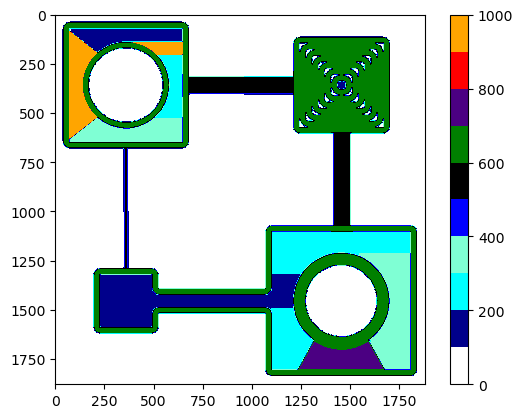

In [1]:
import gui
import files
from timer import Timer
from components import images_tools as it
from os import getcwd
import matplotlib.pyplot as plt
import matplotlib.colors

if not('folders' in globals()):
    home = getcwd()
    folders = files.Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for c in camadas:
    folders.load_islands_hdf5(c)
tangran_cmap = matplotlib.colors.ListedColormap(["white","darkblue","aqua","aquamarine","blue","black","green","indigo","red","orange"])
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        plt.figure()
        plt.imshow(it.final_mapping(c, folders), cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.colorbar()
        print('\n')
%reset_selective -f "camadas"
%reset_selective -f "c"

ROTAS

In [ ]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.Paths(home)
    gui.find_saved_file(folders)
[nozzle_diam_internal,nozzle_diam_external] = gui.ask_parameters_thin_walls()
camadas = folders.load_layers_hdf5()

amendment_size = 0.7 #porcentagem do tamanho da poca de deposicao de material
for c in camadas:
    with Timer("Fase 5"):
        with Timer("Making offset routes"):
            c.offsets.make_routes_o(c.base_frame, 
                                    c.mask_full_ext, 
                                    c.mask_double_ext, 
                                    c.prohibited_areas,
                                    c.path_radius_external,
                                    amendment_size)

In [ ]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.Paths(home)
    gui.find_saved_file(folders)
[nozzle_diam_internal,nozzle_diam_external] = gui.ask_parameters_thin_walls()
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 5"):
        with Timer("Making bridges routes"):
            c.bridges.make_routes_b(c.offsets.regions,
                                    c.path_radius_external,
                                    c.path_radius_internal, 
                                    c.base_frame, 
                                    c.rest_of_picture_f2, 
                                    c.odd_layer, 
                                    c.offsets.all_valid_loops)

In [ ]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd
from components import images_tools as it

if not('folders' in globals()):
    home = getcwd()
    folders = files.Paths(home)
    gui.find_saved_file(folders)
[nozzle_diam_internal,nozzle_diam_external] = gui.ask_parameters_thin_walls()
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 5"):
        with Timer("Making zigzag routes"):
            c.zigzags.make_routes_z(c.base_frame, 
                                    c.path_radius_internal)
            c.zigzags.connect_zigzags(c, c.base_frame, c.path_radius_internal, c.mask_full_int, c.zigzags_mst)
        plt.figure()
        plt.imshow(it.final_routes(c))

In [ ]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd
from components import images_tools as it

if not('folders' in globals()):
    home = getcwd()
    folders = files.Paths(home)
    gui.find_saved_file(folders)
[nozzle_diam_internal,nozzle_diam_external] = gui.ask_parameters_thin_walls()
camadas = folders.load_layers_hdf5()

internal_weaving = 1
for c in camadas:
    with Timer("Fase 6 b"):
        c.internal_weaving(internal_weaving)
        c.internal_weaving(internal_weaving)
    plt.figure()
    plt.imshow(it.final_routes(c))

In [ ]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd
from components import path
from components import images_tools as it

if not('folders' in globals()):
    home = getcwd()
    folders = files.Paths(home)
    gui.find_saved_file(folders)
[nozzle_diam_internal,nozzle_diam_external] = gui.ask_parameters_thin_walls()
camadas = folders.load_layers_hdf5()

fator_epsilon_ext = 0.01
fator_epsilon_int = 0.01
fator_epsilon_par = 0.1

for c in camadas:
    with Timer("Fase 5"):
        with Timer("Making thin walls routes"):
            c.thin_walls.make_routes_tw(c.path_radius, 
                                           c.base_frame, 
                                           c.rest_of_picture_f2, 
                                           c.odd_layer, 
                                           c.offsets.all_valid_loops)
    plt.figure()
    plt.imshow(it.phase5_result(c))

In [ ]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.Paths(home)
    gui.find_saved_file(folders)
[nozzle_diam_internal,nozzle_diam_external] = gui.ask_parameters_thin_walls()
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 6"):
        c.close_routes_external()
    plt.figure()
    plt.imshow(c.external_tree_route.get_img(c.base_frame))
    

In [ ]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.Paths(home)
    gui.find_saved_file(folders)
[nozzle_diam_internal,nozzle_diam_external] = gui.ask_parameters_thin_walls()
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 7"):
        c.close_routes_internal()
    plt.figure()
    plt.imshow(c.internal_tree_route.get_img(c.base_frame))

In [ ]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.Paths(home)
    gui.find_saved_file(folders)
[nozzle_diam_internal,nozzle_diam_external] = gui.ask_parameters_thin_walls()
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 8"):
        c.close_routes_thinwalls()

In [ ]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd
from components import path

if not('folders' in globals()):
    home = getcwd()
    folders = files.Paths(home)
    gui.find_saved_file(folders)
[nozzle_diam_internal,nozzle_diam_external] = gui.ask_parameters_thin_walls()
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 9"):
        c.close_final_path()
    print('\n \n \n')
path.layers_to_Gcode(camadas, folders)
# layers_to_Gcode(camadas, arquivos)